In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [2]:

# Berechnung des Magnetfelds --> Biot-Savart
abstand = ((16.5/2) - 8)/1000
laenge = 0.147
radius = 0.01965
B_durch_I = 1.25663706212 * 1e-6 * (3913/(2*laenge)) * (((abstand+(laenge/2))/((radius**2+(abstand+(laenge/2))**2)**0.5)) - ((abstand-(laenge/2))/((radius**2+(abstand-(laenge/2))**2)**0.5)))
print(B_durch_I)


0.03231550979106642


In [3]:
# theoretisch erwarteter Wert für die Steigung
xi_0_theo = np.sqrt(2.07e-15 / (2*np.pi*0.198))
S_theoretisch = - 2.07e-15 / (2*np.pi*((xi_0_theo)**2)*9.2)
print(S_theoretisch)


-0.021521739130434786


In [4]:
# Berechnung von xi_0 für 0,1 A Schritte
TC = 9.46696
S = 1/(-69.68474)
print(S)
xi_0 = (-(2.07e-15)/(2*np.pi*S*TC))**0.5
print(xi_0)


-0.014350344135602714
4.924462214853391e-08


In [5]:
# Berechnung von xi_0 für 1 A Schritte
TC = 9.46696
S = 1/(-8.51832)
print(S)
xi_0 = (-(2.07e-15)/(2*np.pi*S*TC))**0.5
print(xi_0)


-0.11739404013937021
1.721737516790985e-08


In [6]:

deltaS = 1/(0.81)**2

deltaTC = 0.00439

deltaXi_0 = np.sqrt((0.5*np.sqrt(-(2.07e-15)/(2*np.pi*(S**3)*TC))*deltaS)**2+(0.5*np.sqrt(-(2.07e-15)/(2*np.pi*S*(TC)**3))*deltaTC)**2)

print(deltaXi_0)


1.1176887009134053e-07


In [7]:

l = xi_0**2/(39e-9)
print(l)

deltaL = 2*xi_0/(39e-9)*deltaXi_0
print(deltaL)


7.600974555706635e-09
9.868546504902506e-08


In [8]:

def xi_GL(T):
    return (xi_0/((1-(T/TC))**0.5))

print(xi_GL(0))


1.721737516790985e-08


In [9]:

B_T = 1*B_durch_I
T = 8.76248
deltaT = 6.63981e-5

B_c2_0 = B_T/((1-(T/TC)**2))
print(B_c2_0)

part1 = (-2*B_T)/(1-(T/TC)**2)**2
deltaB_c2_0 = np.sqrt((part1*((-2*T)/(TC**2))*deltaT)**2+(part1*((3*T**2)/(TC**3))*deltaTC)**2)
print(deltaB_c2_0)


0.2255226157504305
0.0037517438668711743


Beste Debye-Temperatur: 219.38834390011027 K # Unsicherheit: 0.4227173959821815 K


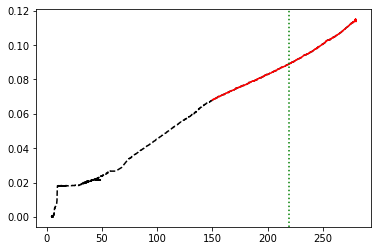

In [10]:

# Bestimmung der Debeye-Temperatur:

nbsi = pd.read_table('data_edited/nbsi81119_edited.dat', header=2, dtype=np.float64) # Daten einlesen

nbsi['R_T'] = nbsi['R_Probe_1'] - nbsi['R_Probe_1'].iloc[nbsi['R_Probe_1'].values.argmin()]

plt.plot(nbsi['Temperatur'], nbsi['R_T'], color='k', linestyle='--')

begin = 150 # Dies ist der Anfang des Bereiches, in dem die Debye-Temperatur bestimmt wird
end = 300   # Hier das Ende (kann auch weggelassen werden, 300K ist mehr als wir im Experiment erreicht haben.)

niob_T = np.asarray(nbsi['Temperatur'][nbsi['Temperatur'] > begin][nbsi['Temperatur'] < end])
niob_R = np.asarray(nbsi['R_T'][nbsi['Temperatur'] > begin][nbsi['Temperatur'] < end])

plt.plot(niob_T, niob_R, color='r')

def niob_R_abh(T):  # Diese Funktion findet zu jeder Temperatur den nähsten Widerstand aus den Messwerten
    idx = np.argmin(abs(niob_T - T))    # Hier finden wir den Index in unserem niob_T - Array von eben jener Temperatur, die am nähsten zur gegebenen liegt.
    return(niob_R[idx]) # Da der Index im Niob_T - Array zum gleichen Index im Niob_R - Array gehört, bekommen wir so den passenden Widerstandswert.

def Gruen_Borel(T, deb): # Das ist die Grüneisen-Borelius-Beziehung, für die die passenste Debye-Temperatur gefunden werden soll.
    return 1.17*niob_R_abh(deb)*T/deb - 0.17*niob_R_abh(deb)    # Für die Debeye Temperatur wird der "funktionale Zusammenhang" Debye(T) durch die Messwerte R(T) bestimmt.

bestDebye, bestDebye_std = curve_fit(Gruen_Borel, niob_T, niob_R) # Dieser Fit findet die optimale Debye Temperatur.
err = (np.sqrt(np.diag(bestDebye_std))[0])

print('Beste Debye-Temperatur:', bestDebye[0], 'K # Unsicherheit:', err, 'K')

plt.axvline(bestDebye[0], color='g', linestyle=':')
plt.show()


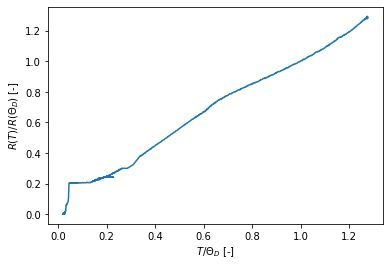

In [11]:

# universelle Auftragung

plt.plot(nbsi['Temperatur']/bestDebye[0], nbsi['R_T']/(niob_R_abh(bestDebye[0])))
plt.xlabel('$T / \Theta_D$ [-]')
plt.ylabel('$R(T)/R(\Theta_D)$ [-]')
plt.savefig('images/reduziertNiob.png', dpi=300)
plt.show()